# TripFare : Predicting Urban Taxi Fare with Machine Learning
#### Using pandas

Mini Project No: 03

By Vikramselvaganesh 

In [2]:
# imports
# Data Collection and Understanding Requirements
import pandas as pd
import numpy as np
import pytz
import matplotlib.pyplot as plt
import seaborn as sns

#ML Requirements
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Requirements
import pickle

## 1. Data Collection

In [3]:
#tfd = Taxi Fare Data
tfd =pd.read_csv('taxi_fare.csv')

In [4]:
tfd

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


## 2. Data Understanding

### Data Table

In [5]:
# tfd is the object stored with the taxi fare data
# the shape show the number of row and columns present the table
tfd.shape

(212345, 18)

In [6]:
tfd.info() # info will show the column name and the data type of the column and is there any null value in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [7]:
tfd.isnull().sum() # isnull is used to find the null in the column and .sum will sum the count.

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

### Data Duplicate

In [8]:
#duplicated is to find the repeated value and the subset will look into the perticular columns the keep = false is given not to change the tdf object with the filter value
tfd[tfd.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], keep=False)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
406,2,2016-03-10 07:08:46,2016-03-10 07:14:05,1,-73.957062,40.802132,1,N,-73.948380,40.803150,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210921,2,2016-03-01 12:10:56,2016-03-01 12:11:43,1,-73.988670,40.741360,1,N,-73.992409,40.742859,4,-2.5,0.0,-0.5,0.00,0.00,-0.3,-3.30
211396,1,2016-03-01 12:12:33,2016-03-01 12:24:42,1,-73.979713,40.786278,1,N,-73.965530,40.773659,1,9.5,0.0,0.5,2.05,0.00,0.3,12.35
211397,1,2016-03-01 12:12:33,2016-03-01 12:24:42,1,-73.983826,40.742569,1,N,-73.991501,40.730297,1,9.0,0.0,0.5,0.00,0.00,0.3,9.80
212050,1,2016-03-01 12:14:44,2016-03-01 12:26:34,1,-73.992195,40.749165,1,N,-73.981575,40.757339,2,8.5,0.0,0.5,0.00,0.00,0.3,9.30


In [9]:
tfd[tfd.duplicated(subset=['VendorID'], keep=False)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [10]:
tfd['VendorID'].value_counts()

VendorID
2    150412
1     61933
Name: count, dtype: int64

In [11]:
tfd[tfd.duplicated(subset=['pickup_longitude', 'pickup_latitude'], keep=False)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
10,2,2016-03-01 00:00:01,2016-03-01 00:02:03,2,-73.988426,40.764160,1,N,-73.992393,40.758224,2,4.0,0.5,0.5,0.00,0.00,0.3,5.30
65,2,2016-03-01 00:00:22,2016-03-01 00:21:37,1,-73.870773,40.773689,1,N,-73.988586,40.759331,1,32.5,0.5,0.5,11.80,5.54,0.3,51.14
95,2,2016-03-01 00:00:31,2016-03-01 00:09:06,1,-74.651306,40.609261,1,N,-74.651306,40.609261,1,6.5,0.5,0.5,1.00,0.00,0.3,8.80
116,2,2016-03-01 00:00:41,2016-03-01 00:11:39,1,0.000000,0.000000,1,N,0.000000,0.000000,1,12.0,0.5,0.5,3.32,0.00,0.3,16.62
151,2,2016-03-01 00:00:56,2016-03-01 00:04:43,1,-73.968468,40.758968,1,N,-73.962593,40.764011,1,4.5,0.5,0.5,1.16,0.00,0.3,6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212222,1,2016-03-01 12:15:15,2016-03-01 12:22:25,1,-73.994087,40.751171,1,N,-73.987343,40.759285,1,6.0,0.0,0.5,1.70,0.00,0.3,8.50
212228,1,2016-03-01 12:15:16,2016-03-01 12:20:09,1,0.000000,0.000000,1,N,0.000000,0.000000,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15
212254,1,2016-03-01 12:15:21,2016-03-01 12:28:03,1,-73.982063,40.770702,1,N,-73.965881,40.795658,1,10.5,0.0,0.5,2.00,0.00,0.3,13.30
212258,2,2016-03-01 12:15:21,2016-03-01 12:59:29,2,0.000000,0.000000,1,N,0.000000,0.000000,1,40.5,0.0,0.5,8.00,5.54,0.3,54.84


In [12]:
tfd[tfd.duplicated(subset=['dropoff_longitude', 'dropoff_latitude'], keep=False)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
116,2,2016-03-01 00:00:41,2016-03-01 00:11:39,1,0.000000,0.000000,1,N,0.000000,0.000000,1,12.0,0.5,0.5,3.32,0.00,0.3,16.62
223,2,2016-03-10 07:07:36,2016-03-10 07:25:36,1,-73.953018,40.766899,1,N,-73.991287,40.749741,1,14.0,0.0,0.5,2.96,0.00,0.3,17.76
245,2,2016-03-10 07:07:44,2016-03-10 07:12:48,1,-73.955513,40.767601,1,N,-73.963890,40.767960,1,5.0,0.0,0.5,1.45,0.00,0.3,7.25
334,2,2016-03-10 07:08:18,2016-03-10 07:11:23,1,-73.954002,40.770458,1,N,-73.947327,40.779800,1,4.5,0.0,0.5,1.06,0.00,0.3,6.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212209,1,2016-03-01 12:15:13,2016-03-01 12:28:19,1,0.000000,0.000000,1,N,0.000000,0.000000,2,10.5,0.0,0.5,0.00,0.00,0.3,11.30
212226,1,2016-03-01 12:15:16,2016-03-01 12:23:45,1,-73.974220,40.760033,1,N,-73.982353,40.768402,1,7.0,0.0,0.5,1.95,0.00,0.3,9.75
212228,1,2016-03-01 12:15:16,2016-03-01 12:20:09,1,0.000000,0.000000,1,N,0.000000,0.000000,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15
212258,2,2016-03-01 12:15:21,2016-03-01 12:59:29,2,0.000000,0.000000,1,N,0.000000,0.000000,1,40.5,0.0,0.5,8.00,5.54,0.3,54.84


In [13]:
tfd[tfd.duplicated(subset=['fare_amount'], keep=False)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [14]:
tfd['fare_amount'].value_counts()

fare_amount
6.00      10478
6.50      10445
7.00      10052
5.50       9995
7.50       9799
          ...  
118.75        1
88.50         1
110.50        1
88.88         1
224.50        1
Name: count, Length: 341, dtype: int64

In [15]:
tfd[tfd.duplicated(subset=['total_amount'], keep=False)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [16]:
tfd['total_amount'].value_counts()

total_amount
7.30      5167
6.80      5076
7.80      4941
8.30      4931
6.30      4712
          ... 
97.88        1
12.93        1
105.84       1
65.32        1
65.79        1
Name: count, Length: 2727, dtype: int64

### Data Missing values

In [17]:
tfd.isnull().sum() #Check for null value (no value is provided)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [18]:
tfd[(tfd['pickup_longitude'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
116,2,2016-03-01 00:00:41,2016-03-01 00:11:39,1,0.0,0.0,1,N,0.000000,0.000000,1,12.0,0.5,0.5,3.32,0.00,0.3,16.62
365,2,2016-03-10 07:08:29,2016-03-10 07:32:55,2,0.0,0.0,1,N,0.000000,0.000000,1,28.0,0.0,0.5,10.30,5.54,0.3,44.64
434,2,2016-03-10 07:08:57,2016-03-10 07:09:03,6,0.0,0.0,1,N,-73.972359,40.794121,2,2.5,0.0,0.5,0.00,0.00,0.3,3.30
478,2,2016-03-10 07:09:15,2016-03-10 07:40:06,1,0.0,0.0,3,N,0.000000,0.000000,1,66.0,0.0,0.0,16.36,15.50,0.3,98.16
491,2,2016-03-10 07:09:20,2016-03-10 07:17:52,5,0.0,0.0,1,N,0.000000,0.000000,1,8.0,0.0,0.5,1.76,0.00,0.3,10.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212064,1,2016-03-01 12:14:46,2016-03-01 12:35:16,1,0.0,0.0,1,N,0.000000,0.000000,3,15.0,0.0,0.5,0.00,0.00,0.3,15.80
212086,1,2016-03-01 12:14:50,2016-03-01 12:20:57,1,0.0,0.0,1,N,0.000000,0.000000,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30
212209,1,2016-03-01 12:15:13,2016-03-01 12:28:19,1,0.0,0.0,1,N,0.000000,0.000000,2,10.5,0.0,0.5,0.00,0.00,0.3,11.30
212228,1,2016-03-01 12:15:16,2016-03-01 12:20:09,1,0.0,0.0,1,N,0.000000,0.000000,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15


In [19]:
tfd[(tfd['dropoff_longitude'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,-73.994583,40.727848,1,N,0.0,0.0,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
116,2,2016-03-01 00:00:41,2016-03-01 00:11:39,1,0.000000,0.000000,1,N,0.0,0.0,1,12.0,0.5,0.5,3.32,0.00,0.3,16.62
365,2,2016-03-10 07:08:29,2016-03-10 07:32:55,2,0.000000,0.000000,1,N,0.0,0.0,1,28.0,0.0,0.5,10.30,5.54,0.3,44.64
478,2,2016-03-10 07:09:15,2016-03-10 07:40:06,1,0.000000,0.000000,3,N,0.0,0.0,1,66.0,0.0,0.0,16.36,15.50,0.3,98.16
491,2,2016-03-10 07:09:20,2016-03-10 07:17:52,5,0.000000,0.000000,1,N,0.0,0.0,1,8.0,0.0,0.5,1.76,0.00,0.3,10.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212064,1,2016-03-01 12:14:46,2016-03-01 12:35:16,1,0.000000,0.000000,1,N,0.0,0.0,3,15.0,0.0,0.5,0.00,0.00,0.3,15.80
212086,1,2016-03-01 12:14:50,2016-03-01 12:20:57,1,0.000000,0.000000,1,N,0.0,0.0,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30
212209,1,2016-03-01 12:15:13,2016-03-01 12:28:19,1,0.000000,0.000000,1,N,0.0,0.0,2,10.5,0.0,0.5,0.00,0.00,0.3,11.30
212228,1,2016-03-01 12:15:16,2016-03-01 12:20:09,1,0.000000,0.000000,1,N,0.0,0.0,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15


In [20]:
tfd[(tfd['passenger_count'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
13787,2,2016-03-10 08:20:38,2016-03-10 15:03:54,0,0.000000,0.000000,2,N,0.000000,0.000000,2,52.0,4.5,0.5,0.00,0.0,0.3,57.30
83120,2,2016-03-01 02:16:14,2016-03-01 02:35:14,0,-73.886902,40.673283,5,N,-73.891998,40.672520,2,34.5,0.0,0.5,0.00,0.0,0.3,35.30
84183,2,2016-03-01 02:40:41,2016-03-01 02:40:59,0,-74.014091,40.706375,5,N,-74.014053,40.706364,1,18.5,0.0,0.5,2.00,0.0,0.3,21.30
121599,1,2016-03-01 07:44:32,2016-03-01 11:44:32,0,-73.984421,40.739712,99,Y,0.000000,0.000000,1,6.8,0.0,0.0,0.00,0.0,0.0,6.80
147430,1,2016-03-01 08:55:49,2016-03-01 08:56:55,0,-74.031792,40.727203,5,N,-74.031761,40.727173,1,122.0,0.0,0.0,0.00,0.0,0.3,122.30
156148,1,2016-03-01 09:20:52,2016-03-01 09:34:01,0,-73.959137,40.801071,5,N,-73.959450,40.820477,2,0.0,0.0,0.0,0.00,0.0,0.3,0.30
177486,1,2016-03-01 10:12:15,2016-03-01 14:12:15,0,-73.976395,40.748325,99,Y,0.000000,0.000000,1,15.8,0.0,0.0,0.00,0.0,0.0,15.80
180349,1,2016-03-01 10:22:23,2016-03-01 10:49:16,0,-73.989105,40.753784,5,N,-74.031265,40.798759,1,40.0,0.0,0.0,10.15,10.5,0.3,60.95
184075,1,2016-03-01 10:36:02,2016-03-01 12:36:02,0,-73.962883,40.766590,99,Y,0.000000,0.000000,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00


In [21]:
tfd[(tfd['fare_amount'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
354,2,2016-03-10 07:08:26,2016-03-10 07:08:29,5,-73.902107,40.764065,1,N,-73.902092,40.764122,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
1309,2,2016-03-10 07:14:39,2016-03-10 07:16:42,1,-73.901962,40.763931,1,N,-73.901970,40.763939,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
2560,2,2016-03-10 07:22:27,2016-03-10 07:23:51,1,-73.901932,40.763931,1,N,-73.901947,40.763924,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
4036,2,2016-03-10 07:31:14,2016-03-10 07:34:20,1,-73.901894,40.763950,1,N,-73.902077,40.763920,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
5196,2,2016-03-10 07:37:32,2016-03-10 07:37:40,6,0.000000,0.000000,1,N,-73.902077,40.763988,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
5462,2,2016-03-10 07:38:58,2016-03-10 07:42:03,1,-73.901871,40.763981,1,N,-73.901909,40.763962,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
6465,2,2016-03-10 07:43:54,2016-03-10 07:45:52,1,-73.901894,40.763969,1,N,-73.901894,40.763969,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
7555,2,2016-03-10 07:49:01,2016-03-10 07:50:18,1,-73.902039,40.764019,1,N,-73.902092,40.763840,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
8415,2,2016-03-10 07:53:17,2016-03-10 07:54:59,1,-73.901993,40.764042,1,N,-73.902008,40.763893,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00
10010,2,2016-03-10 08:01:22,2016-03-10 08:02:51,5,-73.901993,40.764149,1,N,-73.902008,40.764149,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00


In [22]:
tfd[(tfd['passenger_count'] == 0) & (tfd['fare_amount'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
156148,1,2016-03-01 09:20:52,2016-03-01 09:34:01,0,-73.959137,40.801071,5,N,-73.95945,40.820477,2,0.0,0.0,0.0,0.0,0.0,0.3,0.3
184075,1,2016-03-01 10:36:02,2016-03-01 12:36:02,0,-73.962883,40.766590,99,Y,0.00000,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
(tfd == 0).sum() # it will count and sum the value 0 in different columns

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               9
pickup_longitude           2471
pickup_latitude            2471
RatecodeID                    0
store_and_fwd_flag            0
dropoff_longitude          2383
dropoff_latitude           2383
payment_type                  0
fare_amount                  50
extra                    191930
mta_tax                     791
tip_amount                73542
tolls_amount             200726
improvement_surcharge        45
total_amount                 38
dtype: int64

## 3. Feature Engineering

### trip_distance_km

In [24]:
#### trip_distance ####
def haversine(row):
    R = 6371 # Earth radius in kilometers

    lat1 = np.radians(row['pickup_latitude'])
    lon1 = np.radians(row['pickup_longitude'])
    lat2 = np.radians(row['dropoff_latitude'])
    lon2 = np.radians(row['dropoff_longitude'])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

In [25]:
# Apply to DataFrame to find the trip_distance
tfd['trip_distance'] = tfd.apply(haversine, axis=1)

In [26]:
# column rename
tfd.rename(columns={'trip_distance':'trip_distance_km'}, inplace=True)

In [27]:
tfd

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,3.806279
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,3.496576
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.580119
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,1.555737


### pickup_day

In [28]:
#### pickup_day ####
# Change the pickup datetime to datetime format
tfd['tpep_pickup_datetime'] = pd.to_datetime(tfd['tpep_pickup_datetime']) # the change is happening in the same column

In [29]:
# count the day of the week in the pickkup_day column
tfd['pickup_day'] = tfd['tpep_pickup_datetime'].dt.dayofweek

In [30]:
# Defining the day with weekday or weekend in day_type column
tfd['day_type'] = np.where(tfd['tpep_pickup_datetime'].dt.dayofweek >= 5, 'Weekend', 'Weekday')

In [31]:
# removing the column
tfd.drop('pickup_day', axis=1, inplace=True)

In [32]:
# column 
tfd.rename(columns={'day_type':'pickup_day'}, inplace=True)

In [33]:
tfd

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,pickup_day
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096,Weekday
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331,Weekday
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142,Weekday
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547,Weekday
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,3.806279,Weekday
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,3.496576,Weekday
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.580119,Weekday
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,1.555737,Weekday


### am/pm

In [34]:
#### am/pm ####
tfd['am/pm'] = tfd['tpep_pickup_datetime'].dt.strftime('%p')

In [35]:
tfd

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,pickup_day,am/pm
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096,Weekday,AM
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331,Weekday,AM
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142,Weekday,AM
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547,Weekday,AM
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022,Weekday,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,16.0,0.0,0.5,3.36,0.00,0.3,20.16,3.806279,Weekday,PM
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,15.5,0.0,0.5,2.00,0.00,0.3,18.30,3.496576,Weekday,PM
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.580119,Weekday,PM
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,7.0,0.0,0.5,0.00,0.00,0.3,7.80,1.555737,Weekday,PM


### is_night

In [36]:
#### is_night ####
tfd['hours'] = tfd['tpep_pickup_datetime'].dt.hour
tfd['is_night'] = tfd['hours'].apply(lambda x: 1 if x < 6 else 0)

In [37]:
tfd.drop('hours', axis=1, inplace=True)

In [38]:
tfd

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,pickup_day,am/pm,is_night
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,0.5,2.05,0.00,0.3,12.35,3.138096,Weekday,AM,1
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,0.5,3.05,0.00,0.3,15.35,4.303331,Weekday,AM,1
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,0.5,8.00,0.00,0.3,63.80,16.600142,Weekday,AM,1
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.0,0.5,3.78,5.54,0.3,41.62,9.046547,Weekday,AM,1
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.0,0.00,15.50,0.3,113.80,20.400022,Weekday,AM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,0.0,0.5,3.36,0.00,0.3,20.16,3.806279,Weekday,PM,0
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,0.0,0.5,2.00,0.00,0.3,18.30,3.496576,Weekday,PM,0
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,0.0,0.5,0.00,0.00,0.3,4.80,0.580119,Weekday,PM,0
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,0.0,0.5,0.00,0.00,0.3,7.80,1.555737,Weekday,PM,0


### Datetime from UTC TO EDT.

In [39]:
#### Datetime from UTC to EDT.

#Define timezones
utc = pytz.UTC
eastern = pytz.timezone('US/Eastern')

In [40]:
#Localize to UTC (makes it timezone-aware)
tfd['tpep_pickup_datetime'] = tfd['tpep_pickup_datetime'].dt.tz_localize('UTC')

In [41]:
# Convert from UTC to EDT (handles daylight saving automatically)
tfd['pickup_datetime_local'] = tfd['tpep_pickup_datetime'].dt.tz_convert(eastern)

For dropoff_datetime

In [42]:
# conver to datetime format
tfd['tpep_dropoff_datetime'] = pd.to_datetime(tfd['tpep_dropoff_datetime'])

In [43]:
#Localize to UTC (makes it timezone-aware)
tfd['tpep_dropoff_datetime'] = tfd['tpep_dropoff_datetime'].dt.tz_localize('UTC')

In [44]:
# Convert from UTC to EDT (handles daylight saving automatically)
tfd['dropoff__datetime_local'] = tfd['tpep_dropoff_datetime'].dt.tz_convert(eastern)

travel time

In [45]:
# travel_time
tfd['travel_time'] = tfd['dropoff__datetime_local'] - tfd['pickup_datetime_local']

In [46]:
# travel_time to min
tfd['travel_time'] = tfd['travel_time'].dt.total_seconds() / 60

In [47]:
tfd

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,pickup_day,am/pm,is_night,pickup_datetime_local,dropoff__datetime_local,travel_time
0,1,2016-03-01 00:00:00+00:00,2016-03-01 00:07:55+00:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.00,0.3,12.35,3.138096,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,7.916667
1,1,2016-03-01 00:00:00+00:00,2016-03-01 00:11:06+00:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.00,0.3,15.35,4.303331,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,11.100000
2,2,2016-03-01 00:00:00+00:00,2016-03-01 00:31:06+00:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.00,0.3,63.80,16.600142,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,31.100000
3,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,5.54,0.3,41.62,9.046547,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000
4,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,15.50,0.3,113.80,20.400022,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37+00:00,2016-03-01 12:38:53+00:00,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,0.00,0.3,20.16,3.806279,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:38:53-05:00,23.266667
212341,2,2016-03-01 12:15:37+00:00,2016-03-01 12:38:22+00:00,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,0.00,0.3,18.30,3.496576,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:38:22-05:00,22.750000
212342,2,2016-03-01 12:15:37+00:00,2016-03-01 12:18:18+00:00,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,0.00,0.3,4.80,0.580119,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:18:18-05:00,2.683333
212343,1,2016-03-01 12:15:38+00:00,2016-03-01 12:22:47+00:00,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,0.00,0.3,7.80,1.555737,Weekday,PM,0,2016-03-01 07:15:38-05:00,2016-03-01 07:22:47-05:00,7.150000


In [48]:
tfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype                     
---  ------                   --------------   -----                     
 0   VendorID                 212345 non-null  int64                     
 1   tpep_pickup_datetime     212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime    212345 non-null  datetime64[ns, UTC]       
 3   passenger_count          212345 non-null  int64                     
 4   pickup_longitude         212345 non-null  float64                   
 5   pickup_latitude          212345 non-null  float64                   
 6   RatecodeID               212345 non-null  int64                     
 7   store_and_fwd_flag       212345 non-null  object                    
 8   dropoff_longitude        212345 non-null  float64                   
 9   dropoff_latitude         212345 non-null  float64                   
 

## 4. Exploratory Data Analysis (EDA)

In [49]:
tfd['fare_amount'].describe()

count    212345.000000
mean         12.665588
std          10.875584
min         -52.000000
25%           6.500000
50%           9.500000
75%          14.500000
max         819.500000
Name: fare_amount, dtype: float64

In [50]:
tfd['total_amount'].describe()

count    212345.000000
mean         15.649355
std          13.592129
min         -52.800000
25%           8.300000
50%          11.620000
75%          17.160000
max         832.800000
Name: total_amount, dtype: float64

In [51]:
tfd['payment_type'].value_counts()

payment_type
1    144155
2     67565
3       440
4       185
Name: count, dtype: int64

### Fare vs Distance

C:\Users\vikra\AppData\Local\Temp\ipykernel_47240\3316335836.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


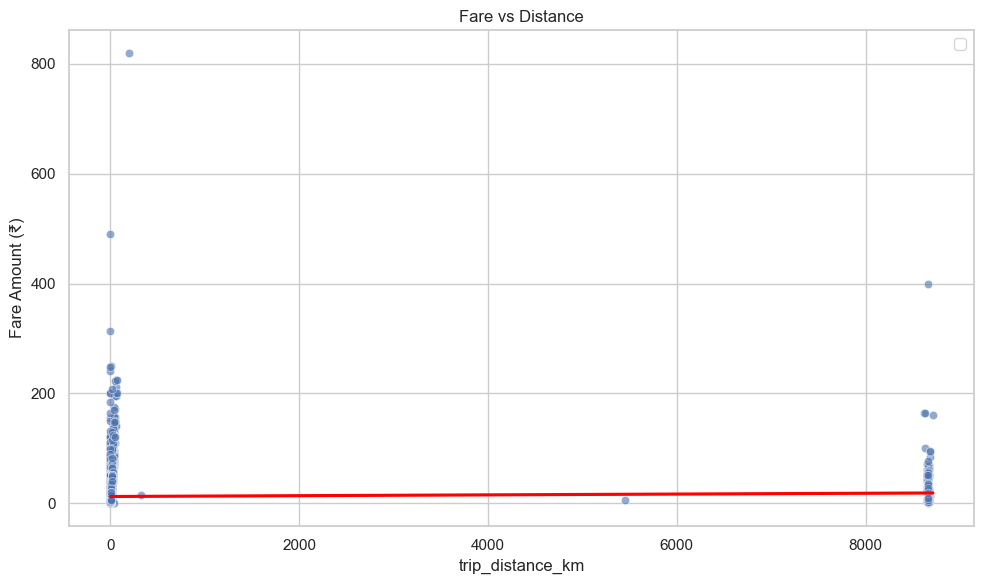

In [52]:
#### Fare vs Distance ####
# Clean data
tfd_plot1 = tfd[(tfd['fare_amount'] > 0) & (tfd['trip_distance_km'] > 0)]  # Remove zero or negative values

# Set plot style
sns.set(style='whitegrid')

# Create plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tfd_plot1, x='trip_distance_km', y='fare_amount', alpha=0.6)

# try: Add regression line
sns.regplot(data=tfd, x='trip_distance_km', y='fare_amount', scatter=False, color='red', line_kws={'label':"Linear Fit"})

# Customize labels and title
plt.xlabel('trip_distance_km')
plt.ylabel('Fare Amount (₹)')
plt.title('Fare vs Distance')
plt.legend()
plt.tight_layout()
plt.show()

### Fare vs Passenger Count

C:\Users\vikra\AppData\Local\Temp\ipykernel_47240\965443447.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


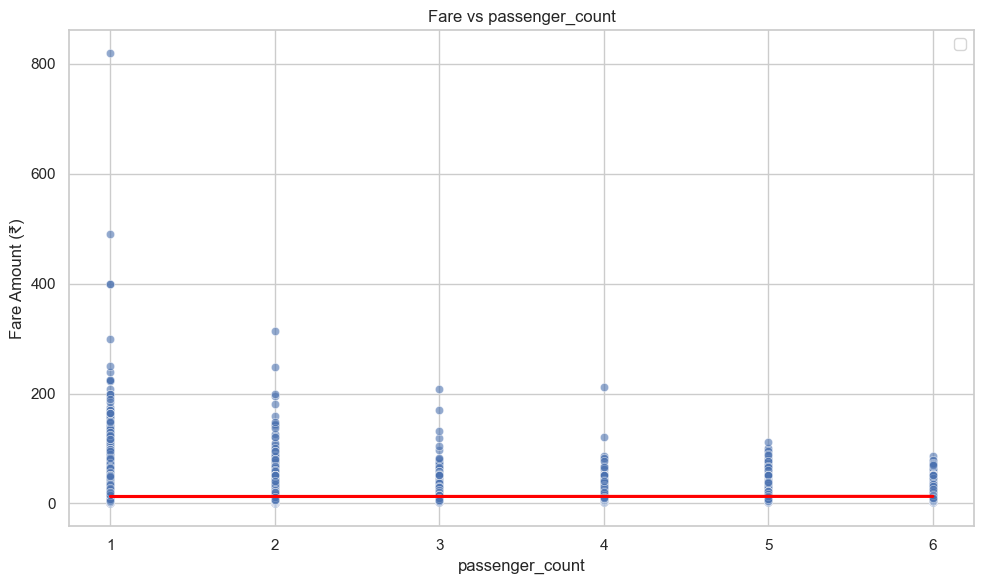

In [53]:
#### Fare vs Passenger Count ####
# Clean data
tfd_plot2 = tfd[(tfd['fare_amount'] > 0) & (tfd['passenger_count'] > 0)]  # Remove zero or negative values

# Set plot style
sns.set(style='whitegrid')

# Create plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tfd_plot2, x='passenger_count', y='fare_amount', alpha=0.6)

# Add regression line
sns.regplot(data=tfd_plot2, x='passenger_count', y='fare_amount', scatter=False, color='red', line_kws={'label':"Linear Fit"})

# Customize labels and title
plt.xlabel('passenger_count')
plt.ylabel('Fare Amount (₹)')
plt.title('Fare vs passenger_count')
plt.legend()
plt.tight_layout()
plt.show()

### Outlier Dectection

In [54]:
#### Outlier Dectection ####
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [55]:
# Apply to each column
outliers_fare = detect_outliers_iqr(tfd, 'fare_amount')
outliers_distance = detect_outliers_iqr(tfd, 'trip_distance_km')
outliers_duration = detect_outliers_iqr(tfd, 'travel_time')  # assuming duration is in minutes or seconds

In [56]:
outliers_fare.shape

(17353, 25)

In [57]:
outliers_distance.shape

(21441, 25)

In [58]:
outliers_duration.shape

(10251, 25)

### Fare variations across time

In [59]:
# for time of the day
tfd['pickup_hour'] = tfd['pickup_datetime_local'].dt.hour

# Bucket into the Early Morning, Morning, afternoon, evening, Night and Late Night for the easy understanding of the time
def time_bucket(hour):
    if 5 <= hour < 9:
        return 'Early Morning'
    elif 9 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

tfd['time_bucket'] = tfd['pickup_hour'].apply(time_bucket)

In [60]:
# getting the date 
tfd['pickup_date'] = tfd['pickup_datetime_local'].dt.date

In [61]:
# getting the date 
tfd['pickup_month'] = tfd['pickup_datetime_local'].dt.month

In [62]:
# counts the number of pickup on the date
tfd['pickup_date'].value_counts()

pickup_date
2016-03-01    112944
2016-03-10     81783
2016-02-29     17618
Name: count, dtype: int64

C:\Users\vikra\AppData\Local\Temp\ipykernel_47240\1698839480.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


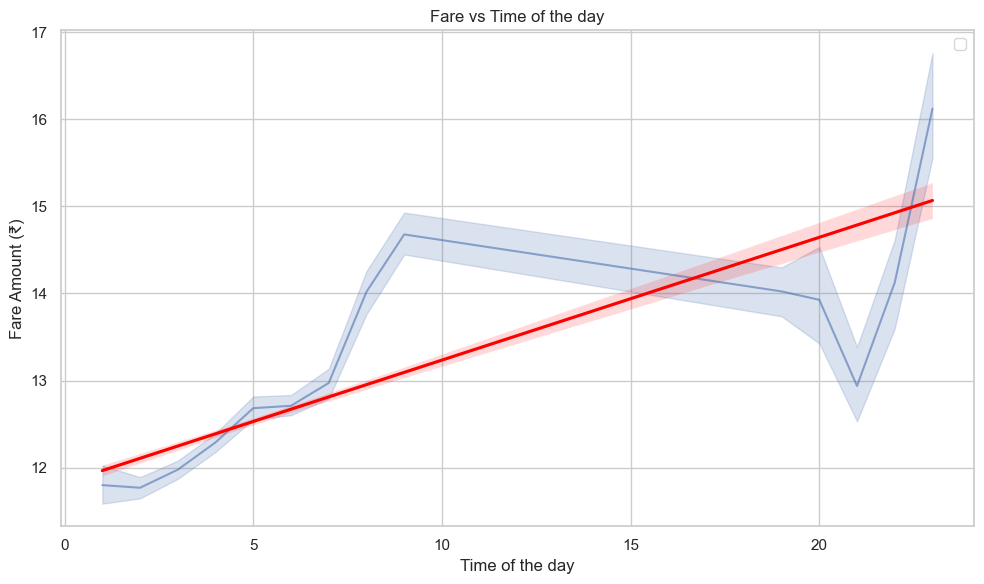

In [63]:
#### Fare vs times ####
# Clean data
tfd_plot3 = tfd[(tfd['fare_amount'] > 0) & (tfd['pickup_hour'] > 0)]  # Remove zero or negative values

# Set plot style
sns.set(style='whitegrid')

# Create plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=tfd_plot3, x='pickup_hour', y='fare_amount', alpha=0.6)

# Add regression line
sns.regplot(data=tfd_plot3, x='pickup_hour', y='fare_amount', scatter=False, color='red', line_kws={'label':"Linear Fit"})

# Customize labels and title
plt.xlabel('Time of the day')
plt.ylabel('Fare Amount (₹)')
plt.title('Fare vs Time of the day')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\vikra\AppData\Local\Temp\ipykernel_47240\2598017296.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


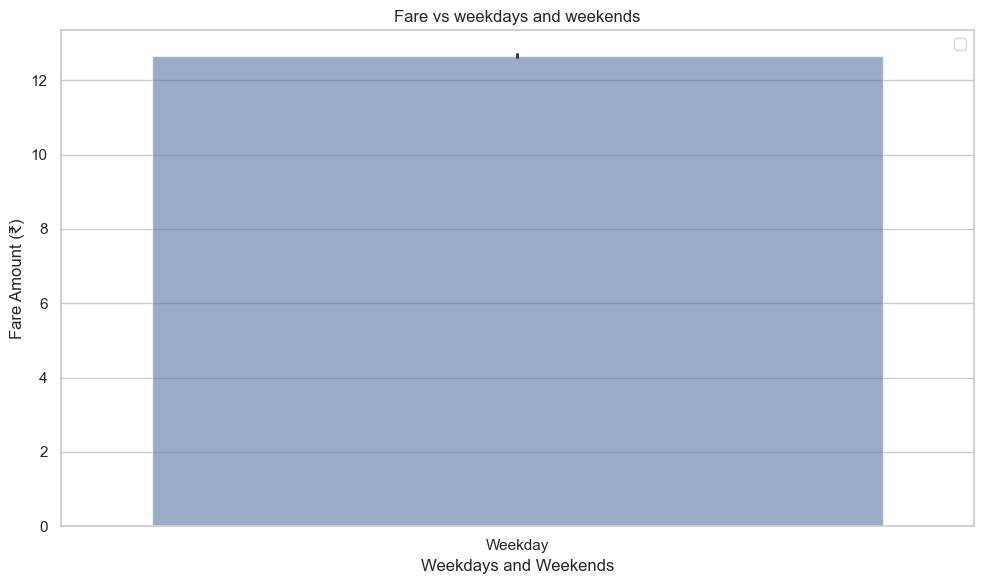

In [64]:
#### Fare vs weekdays and weekends ####

# Set plot style
sns.set(style='whitegrid')

# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tfd, x='pickup_day', y='fare_amount', alpha=0.6)

# Customize labels and title
plt.xlabel('Weekdays and Weekends')
plt.ylabel('Fare Amount (₹)')
plt.title('Fare vs weekdays and weekends')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\vikra\AppData\Local\Temp\ipykernel_47240\1290479087.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


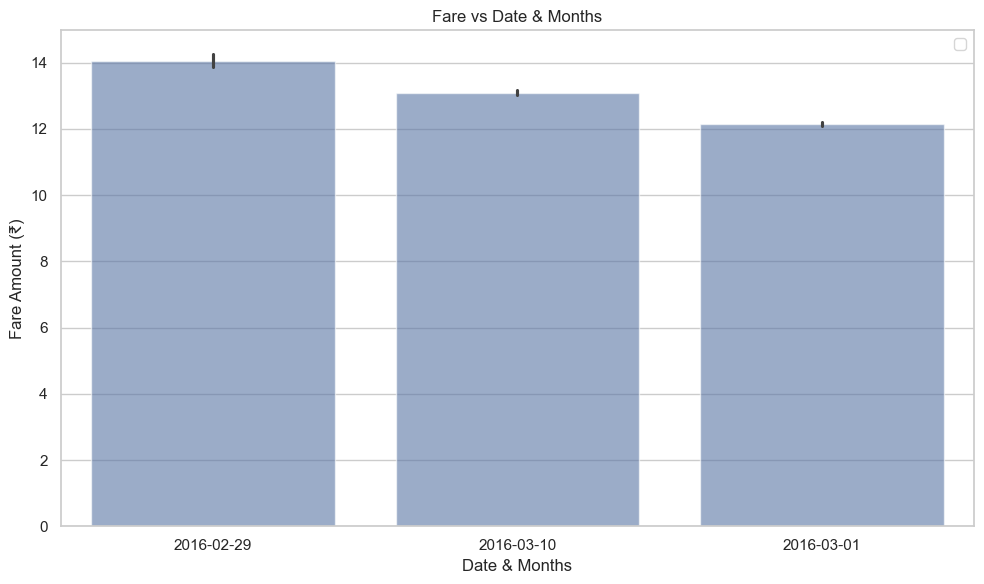

In [65]:
#### Fare vs date and Months ####

# Set plot style
sns.set(style='whitegrid')

# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tfd, x='pickup_date', y='fare_amount', alpha=0.6)

# Customize labels and title
plt.xlabel('Date & Months')
plt.ylabel('Fare Amount (₹)')
plt.title('Fare vs Date & Months')
plt.legend()
plt.tight_layout()
plt.show()

### Distrubution of Trip Distances, Durations and pickup hours

In [66]:
tfd['travel_time'].value_counts()

travel_time
7.133333       250
5.450000       249
5.900000       249
6.283333       241
6.666667       239
              ... 
1391.450000      1
71.183333        1
1359.483333      1
1428.566667      1
1437.766667      1
Name: count, Length: 4820, dtype: int64

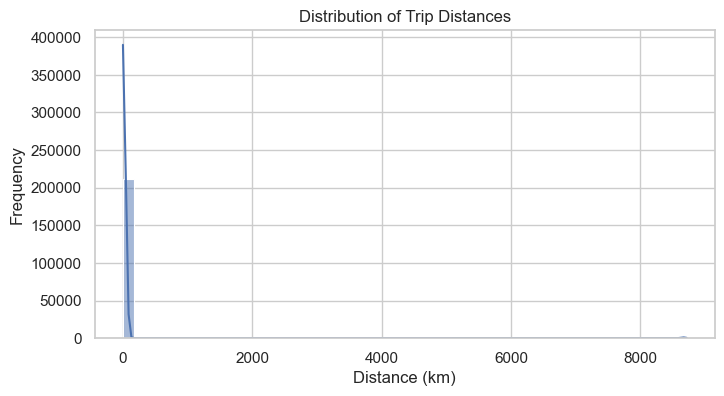

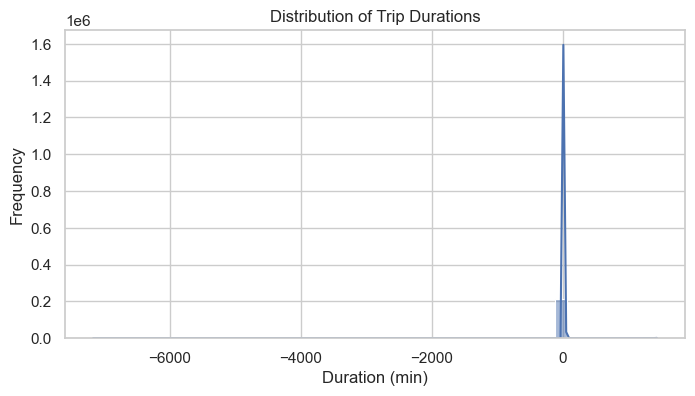

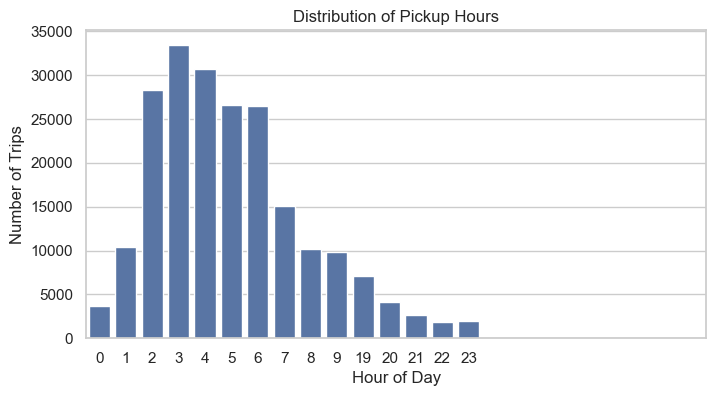

In [67]:
# Set plot style
sns.set(style='whitegrid')

# Plot 1: Trip Distance Distribution
plt.figure(figsize=(8, 4))
sns.histplot(tfd['trip_distance_km'], bins=50, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Trip Duration Distribution
plt.figure(figsize=(8, 4))
sns.histplot(tfd['travel_time'], bins=50, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Pickup Hour Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='pickup_hour', data=tfd)
plt.title('Distribution of Pickup Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.show()

In [68]:
tfd

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,pickup_day,am/pm,is_night,pickup_datetime_local,dropoff__datetime_local,travel_time,pickup_hour,time_bucket,pickup_date,pickup_month
0,1,2016-03-01 00:00:00+00:00,2016-03-01 00:07:55+00:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,7.916667,19,Evening,2016-02-29,2
1,1,2016-03-01 00:00:00+00:00,2016-03-01 00:11:06+00:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,11.100000,19,Evening,2016-02-29,2
2,2,2016-03-01 00:00:00+00:00,2016-03-01 00:31:06+00:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,31.100000,19,Evening,2016-02-29,2
3,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,19,Evening,2016-02-29,2
4,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,Weekday,AM,1,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,0.000000,19,Evening,2016-02-29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37+00:00,2016-03-01 12:38:53+00:00,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:38:53-05:00,23.266667,7,Early Morning,2016-03-01,3
212341,2,2016-03-01 12:15:37+00:00,2016-03-01 12:38:22+00:00,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:38:22-05:00,22.750000,7,Early Morning,2016-03-01,3
212342,2,2016-03-01 12:15:37+00:00,2016-03-01 12:18:18+00:00,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,Weekday,PM,0,2016-03-01 07:15:37-05:00,2016-03-01 07:18:18-05:00,2.683333,7,Early Morning,2016-03-01,3
212343,1,2016-03-01 12:15:38+00:00,2016-03-01 12:22:47+00:00,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,Weekday,PM,0,2016-03-01 07:15:38-05:00,2016-03-01 07:22:47-05:00,7.150000,7,Early Morning,2016-03-01,3


### Fare per mile and Fare per minute

In [69]:
# Distance in km to mile Converstion
tfd['trip_distance_mile'] = tfd['trip_distance_km'] * 0.621371

In [70]:
# create column for fare per mile
tfd['fare_per_mile'] = tfd['fare_amount'] / tfd['trip_distance_mile']

# create column for fare per minute
tfd['fare_per_minute'] = tfd['fare_amount'] / tfd['travel_time']  # if duration is in seconds travel_time/60

# create column for trip_length range group
tfd['trip_length_bucket'] = pd.cut(tfd['trip_distance_mile'], bins=[0, 2, 5, 10, 20, 50], labels=['0–2', '2–5', '5–10', '10–20', '20+'])

Text(0.5, 1.0, 'Fare Efficiency by Hour of Day')

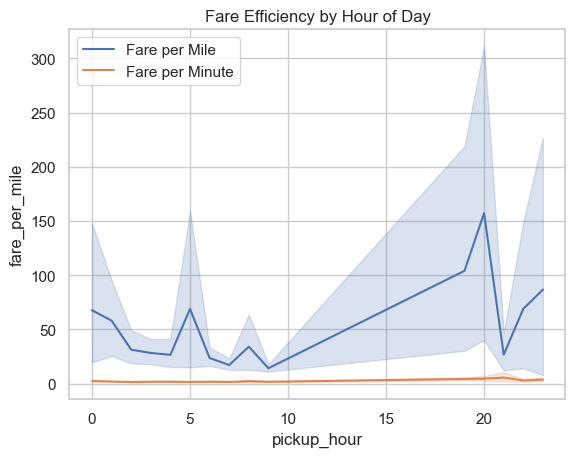

In [71]:
# Fare efficiency by hour of Day
sns.lineplot(data=tfd, x='pickup_hour', y='fare_per_mile', label='Fare per Mile')
sns.lineplot(data=tfd, x='pickup_hour', y='fare_per_minute', label='Fare per Minute')
plt.title('Fare Efficiency by Hour of Day')
# This Show how pricing efficiency changes across the day-experct

<Axes: xlabel='pickup_hour', ylabel='fare_per_minute'>

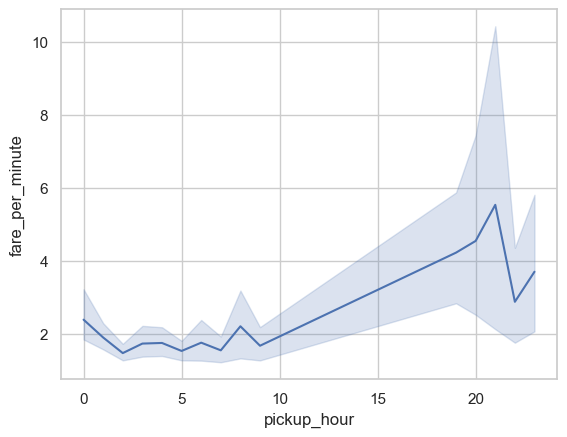

In [72]:
sns.lineplot(data=tfd, x='pickup_hour', y='fare_per_minute')

Text(0.5, 1.0, 'Fare Efficiency by Trip Length')

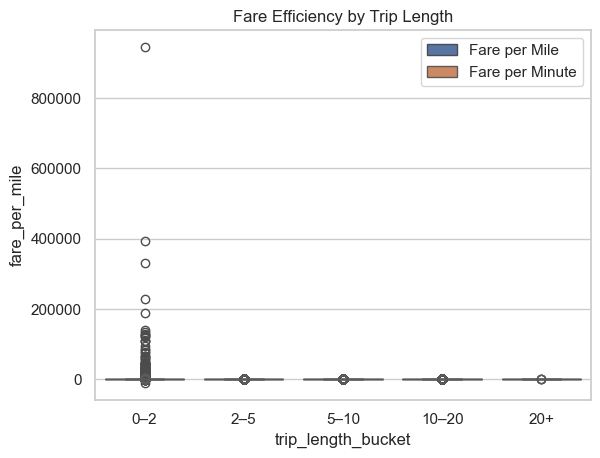

In [73]:
# Behavior across trip lengths
sns.boxplot(x='trip_length_bucket', y='fare_per_mile', data=tfd, label='Fare per Mile')
sns.boxplot(x='trip_length_bucket', y='fare_per_minute', data=tfd, label='Fare per Minute')
plt.title('Fare Efficiency by Trip Length')
# This reveals whether short trips are overpriced or long trips underpriced

### Trip counts by pickup hour and pickup day

In [74]:
# pickup day 
tfd['pickup_day_'] = tfd['pickup_datetime_local'].dt.day_name()

In [75]:
# Group by hour and day
trip_counts = tfd.groupby(['pickup_day', 'pickup_hour']).size().reset_index(name='trip_count')

In [76]:
# Sort days to follow calendar order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trip_counts['pickup_day'] = pd.Categorical(trip_counts['pickup_day'], categories=day_order, ordered=True)

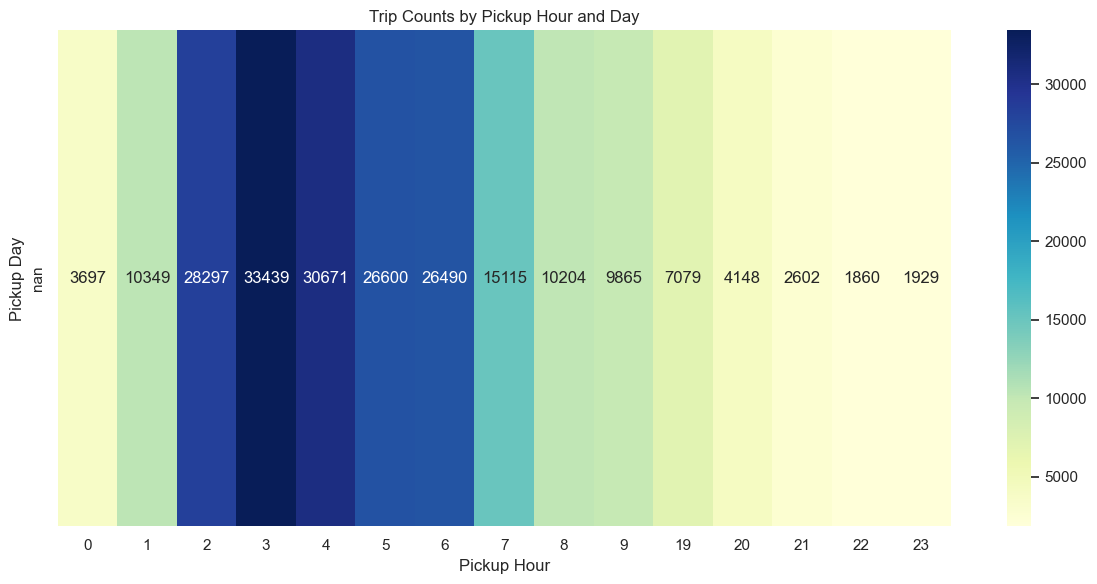

In [77]:
# Pivot for heatmap
pivot_table = trip_counts.pivot(index='pickup_day', columns='pickup_hour', values='trip_count')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Trip Counts by Pickup Hour and Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Pickup Day')
plt.tight_layout()
plt.show()

### Night rides and weekend trips on fare amounts

In [78]:
fare_pivot = pd.pivot_table(tfd, values='fare_amount', index='is_night', columns='pickup_day', aggfunc='mean')

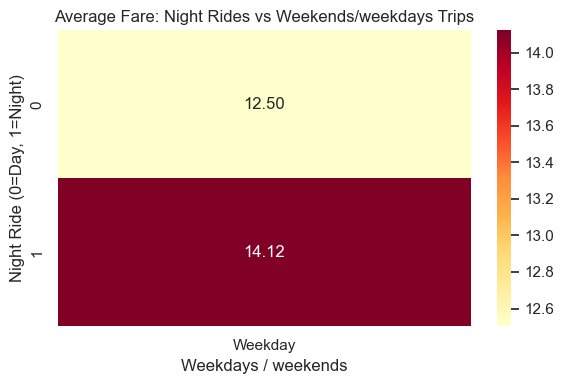

In [79]:
# create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(fare_pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Average Fare: Night Rides vs Weekends/weekdays Trips')
plt.xlabel('Weekdays / weekends')
plt.ylabel('Night Ride (0=Day, 1=Night)')
plt.tight_layout()
plt.show()

## 5. Data Transformation

<Axes: xlabel='fare_amount'>

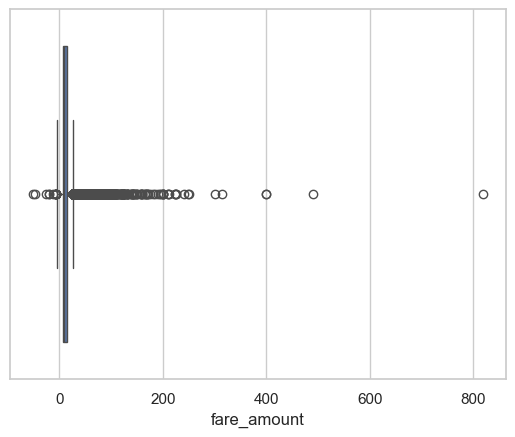

In [80]:
# Create Boxplot for fare_amount
sns.boxplot(x=tfd['fare_amount'])

In [81]:
# Z - score
tfd['fare_zscore'] = zscore(tfd['fare_amount'])
tfd_filtered = tfd[tfd['fare_zscore'].abs() < 3]

In [82]:
# filtered the fare amount
tfd_filtered = tfd[(tfd['fare_amount'] > 0) & (tfd['fare_amount'] < 10000)]

In [83]:

lower = tfd['fare_amount'].quantile(0.01)
upper = tfd['fare_amount'].quantile(0.99)
tfd['fare_amount_clipped'] = tfd['fare_amount'].clip(lower, upper)

In [84]:

Q1 = tfd['fare_amount'].quantile(0.25)
Q3 = tfd['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_filtered = tfd[(tfd['fare_amount'] >= Q1 - 1.5 * IQR) & (tfd['fare_amount'] <= Q3 + 1.5 * IQR)]

tfd['is_fare_outlier'] = ((tfd['fare_amount'] < Q1 - 1.5 * IQR) | (tfd['fare_amount'] > Q3 + 1.5 * IQR)).astype(int)

In [85]:
# Log transform
tfd['Log_fare_amount'] = np.log1p(tfd['fare_amount'])

# Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
tfd['fare_amount_yeojohnson'] = pt.fit_transform(tfd[['fare_amount']])

# Quantile transform
qt = QuantileTransformer(output_distribution='normal')
tfd['fare_amount_quantile'] = qt.fit_transform(tfd[['fare_amount']])


C:\Users\vikra\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [86]:
tfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype                     
---  ------                   --------------   -----                     
 0   VendorID                 212345 non-null  int64                     
 1   tpep_pickup_datetime     212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime    212345 non-null  datetime64[ns, UTC]       
 3   passenger_count          212345 non-null  int64                     
 4   pickup_longitude         212345 non-null  float64                   
 5   pickup_latitude          212345 non-null  float64                   
 6   RatecodeID               212345 non-null  int64                     
 7   store_and_fwd_flag       212345 non-null  object                    
 8   dropoff_longitude        212345 non-null  float64                   
 9   dropoff_latitude         212345 non-null  float64                   
 

In [87]:
tfd['pickup_day_'].value_counts()

pickup_day_
Tuesday     112944
Thursday     81783
Monday       17618
Name: count, dtype: int64

In [88]:
tfd.drop('pickup_date', axis=1, inplace=True)

In [89]:
tfd.drop('pickup_day_', axis=1, inplace=True)

In [90]:
tfd.drop('pickup_day', axis=1, inplace=True)

In [91]:
tfd.drop('trip_length_bucket', axis=1, inplace=True)

In [92]:
tfd['store_and_fwd_flag'] = tfd['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [93]:
tfd['am/pm'] = tfd['am/pm'].map({'AM': 0, 'PM': 1})

In [94]:
from sklearn.preprocessing import OrdinalEncoder

time_order = [['Late Night', 'Morning', 'Afternoon', 'Evening','Early Morning', 'Night']]
oe = OrdinalEncoder(categories=time_order)
tfd['time_bucket_encoded'] = oe.fit_transform(tfd[['time_bucket']])

In [95]:
tfd['time_bucket_encoded'].value_counts()
# removing the column
tfd.drop('time_bucket', axis=1, inplace=True)

In [96]:
tfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype                     
---  ------                   --------------   -----                     
 0   VendorID                 212345 non-null  int64                     
 1   tpep_pickup_datetime     212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime    212345 non-null  datetime64[ns, UTC]       
 3   passenger_count          212345 non-null  int64                     
 4   pickup_longitude         212345 non-null  float64                   
 5   pickup_latitude          212345 non-null  float64                   
 6   RatecodeID               212345 non-null  int64                     
 7   store_and_fwd_flag       212345 non-null  int64                     
 8   dropoff_longitude        212345 non-null  float64                   
 9   dropoff_latitude         212345 non-null  float64                   
 

## 6. Feature Selection

In [97]:
# Calculate the correlation Matrix
correlation_matrix = tfd.corr()

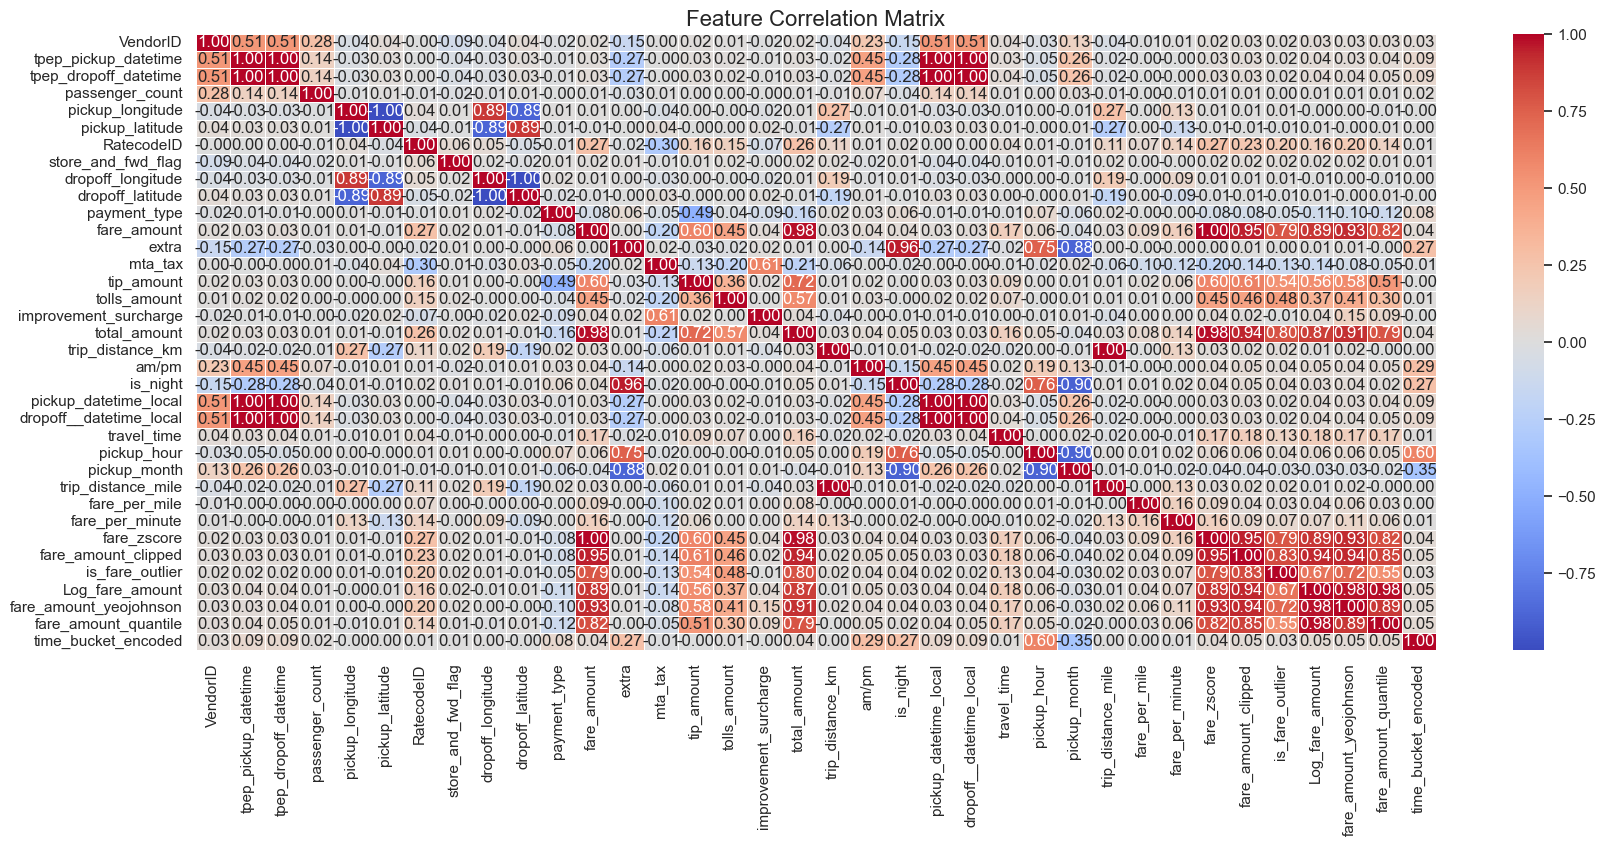

In [98]:
### Visualize the Correlation Matrix with a Heatmap ###
# A heatmap is a great way to visually interpret the correlation matrix.
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

In [99]:
### Analyze the Results ###
# You can also get a specific column's correlation with the target variable.
# We'll assume 'fare_amount' is your target.
print("\nCorrelation with 'fare_amount':")
print(correlation_matrix['fare_amount'].sort_values(ascending=False))


Correlation with 'fare_amount':
fare_zscore                1.000000
fare_amount                1.000000
total_amount               0.977607
fare_amount_clipped        0.950311
fare_amount_yeojohnson     0.929482
Log_fare_amount            0.893651
fare_amount_quantile       0.818779
is_fare_outlier            0.786323
tip_amount                 0.601308
tolls_amount               0.449035
RatecodeID                 0.266776
travel_time                0.165525
fare_per_minute            0.161862
fare_per_mile              0.091428
pickup_hour                0.057854
is_night                   0.044742
am/pm                      0.043829
time_bucket_encoded        0.043405
improvement_surcharge      0.037361
tpep_dropoff_datetime      0.031818
dropoff__datetime_local    0.031818
pickup_datetime_local      0.030373
tpep_pickup_datetime       0.030373
trip_distance_km           0.029481
trip_distance_mile         0.029481
VendorID                   0.023872
store_and_fwd_flag         0.02

In [100]:
tfd['payment_type'].value_counts()

payment_type
1    144155
2     67565
3       440
4       185
Name: count, dtype: int64

In [101]:
### Filter out low-count groups to avoid NaN values ###
# Get the counts of each unique value in the 'payment_type' column
value_counts = tfd['payment_type'].value_counts()
# Identify the values that appear more than a certain threshold (e.g., 10 times)
valid_types = value_counts[value_counts > 10].index.tolist()
# Filter the DataFrame to only include these valid payment types
tfd = tfd[tfd['payment_type'].isin(valid_types)]
print(f"\nFiltered DataFrame to include only payment types with more than 10 occurrences.")



Filtered DataFrame to include only payment types with more than 10 occurrences.


In [102]:
### Perform the ANOVA Test ###
# We will use the 'payment_type' column as the categorical variable and
# 'fare_amount' as the continuous variable.
# ANOVA tests if the mean fare is significantly different across payment types.

# First, separate the data into groups for each payment type
groups = [tfd['fare_amount'][tfd['payment_type'] == p_type] for p_type in valid_types]

# Perform the ANOVA test using f_oneway
f_statistic, p_value = stats.f_oneway(*groups)

print("\n--- ANOVA Test Results ---")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3e}")
print("-" * 25)



--- ANOVA Test Results ---
F-statistic: 427.07
P-value: 1.206e-276
-------------------------


In [103]:
### Interpretation of the P-value ###
# The p-value indicates the probability of observing the data if there were no difference
# between the group means.
#
# Rule of thumb:
# - If p-value < 0.05, it is considered statistically significant. This suggests there is
#   a significant difference in the mean 'fare_amount' across the different 'payment_type' groups.
# - If p-value > 0.05, there is no significant difference.

In [104]:
# --- 4. Post-Hoc Test (Tukey's HSD) ---
# If the ANOVA test shows a significant result (p-value < 0.05), a post-hoc test
# is needed to determine *which* specific groups are different from each other.
print("\n--- Tukey's HSD Post-Hoc Test Results ---")
# Reset index for the test to work correctly
tfd_test = tfd.reset_index(drop=True)
tfd_test


--- Tukey's HSD Post-Hoc Test Results ---


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,trip_distance_mile,fare_per_mile,fare_per_minute,fare_zscore,fare_amount_clipped,is_fare_outlier,Log_fare_amount,fare_amount_yeojohnson,fare_amount_quantile,time_bucket_encoded
0,1,2016-03-01 00:00:00+00:00,2016-03-01 00:07:55+00:00,1,-73.976746,40.765152,1,0,-74.004265,40.746128,...,1.949922,4.615569,1.136842,-0.337048,9.0,0,2.302585,-0.294160,-0.089192,3.0
1,1,2016-03-01 00:00:00+00:00,2016-03-01 00:11:06+00:00,1,-73.983482,40.767925,1,0,-74.005943,40.733166,...,2.673965,4.113741,0.990991,-0.153150,11.0,0,2.484907,-0.046646,0.258792,3.0
2,2,2016-03-01 00:00:00+00:00,2016-03-01 00:31:06+00:00,2,-73.782021,40.644810,1,0,-73.974541,40.675770,...,10.314847,5.283646,1.752412,3.846645,52.0,1,4.016383,3.305548,2.596889,3.0
3,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,3,-73.863419,40.769814,1,0,-73.969650,40.757767,...,5.621262,5.603724,inf,1.731811,31.5,1,3.481240,1.818497,1.521525,3.0
4,2,2016-03-01 00:00:00+00:00,2016-03-01 00:00:00+00:00,5,-73.971741,40.792183,3,0,-74.177170,40.695053,...,12.675982,7.731156,inf,7.846440,52.0,1,4.595120,5.462900,3.221792,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37+00:00,2016-03-01 12:38:53+00:00,1,-73.955688,40.782261,1,0,-73.974915,40.751282,...,2.365112,6.765008,0.687679,0.306597,16.0,0,2.833213,0.497639,0.830234,4.0
212341,2,2016-03-01 12:15:37+00:00,2016-03-01 12:38:22+00:00,1,-74.002197,40.715042,1,0,-73.976295,40.739609,...,2.172671,7.134076,0.681319,0.260622,15.5,0,2.803360,0.446980,0.788455,4.0
212342,2,2016-03-01 12:15:37+00:00,2016-03-01 12:18:18+00:00,1,-73.991173,40.733170,1,0,-73.994324,40.728531,...,0.360469,11.096646,1.490683,-0.796795,4.0,0,1.609438,-1.045336,-1.798663,4.0
212343,1,2016-03-01 12:15:38+00:00,2016-03-01 12:22:47+00:00,2,-73.972099,40.786446,1,0,-73.955872,40.779755,...,0.966690,7.241207,0.979021,-0.520947,7.0,0,2.079442,-0.566477,-0.545244,4.0


In [105]:
# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=tfd_test['fare_amount'], 
                                 groups=tfd_test['payment_type'], 
                                 alpha=0.05)

print(tukey_result)
print("-" * 35)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -1.7904    0.0 -1.9202 -1.6605   True
     1      3  -2.2775 0.0001 -3.6075 -0.9475   True
     1      4  -3.7757    0.0  -5.825 -1.7264   True
     2      3  -0.4871 0.7837 -1.8194  0.8452  False
     2      4  -1.9853 0.0619 -4.0361  0.0655  False
     3      4  -1.4982 0.3919 -3.9391  0.9427  False
----------------------------------------------------
-----------------------------------


## 7. Model Building

In [106]:
### Step 1: Define Features (X) and Target (y) ###
# Select the columns you want to use as features.
# We'll use the ones that we know are important from the previous analysis.
features = ['trip_distance_mile', 'pickup_hour', 'passenger_count', 'is_night']
X = tfd[features]

# We will use 'fare_amount' as our target variable.
y = tfd['fare_amount']

In [107]:
### Step 2: Split Data into Training and Testing Sets ###
# It's crucial to split your data to evaluate the model's performance on unseen data.
# 80% of the data will be used for training, and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 169876 samples
Testing set size: 42469 samples


### Random Forest

In [108]:
# ---Step 3: Train the Random Forest Regressor ---
# Initialize the Random Forest model.
# n_estimators: The number of decision trees in the forest. More trees generally lead to better performance but can be slower.
# random_state: Ensures the results are reproducible.
model_4 = RandomForestRegressor(n_estimators=100, random_state=42)

print("\nTraining the Random Forest model...")
model_4.fit(X_train, y_train)


Training the Random Forest model...


RandomForestRegressor(random_state=42)

In [109]:
# ---Step 4: Make Predictions ---
# Use the trained model to make predictions on the test set.
y_pred = model_4.predict(X_test)
y_pred

array([10.01 ,  3.985,  6.91 , ..., 10.565, 29.5  ,  5.945])

In [110]:
# ---Step 5: Evaluate the Model's Performance ---
# We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2) score.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results For Random Forest ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- Model Evaluation Results For Random Forest ---
Mean Absolute Error (MAE): $2.47
Mean Squared Error (MSE): $34.84
Root Mean Squared Error (RMSE): $5.90
R-squared (R2) Score: 0.7301


In [111]:
# --- Analyze Feature Importance ---
# Random Forest can tell you which features were most important for the predictions.
feature_importances = pd.Series(model_4.feature_importances_, index=features).sort_values(ascending=False)

print("\n--- Feature Importances ---")
print(feature_importances)


--- Feature Importances ---
trip_distance_mile    0.954461
pickup_hour           0.025596
passenger_count       0.013243
is_night              0.006700
dtype: float64


### Linear Regresssion

In [112]:
# ---Step 3: Train the Linear Regression Model ---
# Initialize the Linear Regression model.
model_1 = LinearRegression()

print("\nTraining the Linear Regression model...")
model_1.fit(X_train, y_train)


Training the Linear Regression model...


LinearRegression()

In [113]:
# ---Step 4: Make Predictions ---
# Use the trained model to make predictions on the test set.
y_pred = model_1.predict(X_test)

In [114]:
# ---Step 5: Evaluate the Model's Performance ---
# We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2) score.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- Model Evaluation Results ---
Mean Absolute Error (MAE): $6.87
Mean Squared Error (MSE): $128.62
Root Mean Squared Error (RMSE): $11.34
R-squared (R2) Score: 0.0036


### Ridge

In [115]:
# ---Step 3: Train the Ridge Model ---
# Initialize the Ridge model. Ridge is a type of regularized linear regression.
# The 'alpha' parameter controls the strength of the regularization.
model_2 = Ridge(alpha=1.0)

print("\nTraining the Ridge model...")
model_2.fit(X_train, y_train)


Training the Ridge model...


Ridge()

In [116]:
# ---Step 4: Make Predictions ---
# Use the trained model to make predictions on the test set.
y_pred = model_2.predict(X_test)

In [117]:
# ---Step 5: Evaluate the Model's Performance ---
# We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2) score.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- Model Evaluation Results ---
Mean Absolute Error (MAE): $6.87
Mean Squared Error (MSE): $128.62
Root Mean Squared Error (RMSE): $11.34
R-squared (R2) Score: 0.0036


### Lasso

In [118]:
# ---Step 3: Train the Lasso Model ---
# Initialize the Lasso model. Lasso is a type of linear regression that uses L1 regularization.
# The 'alpha' parameter controls the strength of the regularization.
model_3 = Lasso(alpha=1.0)

print("\nTraining the Lasso model...")
model_3.fit(X_train, y_train)


Training the Lasso model...


Lasso()

In [119]:
# ---Step 4: Make Predictions ---
# Use the trained model to make predictions on the test set.
y_pred = model_3.predict(X_test)

In [120]:
# ---Step 5: Evaluate the Model's Performance ---
# We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2) score.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- Model Evaluation Results ---
Mean Absolute Error (MAE): $6.87
Mean Squared Error (MSE): $128.67
Root Mean Squared Error (RMSE): $11.34
R-squared (R2) Score: 0.0033


### GradientBoosting (Best)

In [121]:
# ---Step 3: Train the Gradient Boosting Model ---
# Initialize the Gradient Boosting Regressor model.
# This model builds a series of weak learners (decision trees) sequentially.
# - n_estimators: The number of boosting stages to perform.
# - learning_rate: Controls the contribution of each tree.
# - max_depth: The maximum depth of the individual regression estimators.
model_5 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

print("\nTraining the Gradient Boosting model...")
model_5.fit(X_train, y_train)


Training the Gradient Boosting model...


GradientBoostingRegressor(random_state=42)

In [122]:
# ---Step 4: Make Predictions ---
# Use the trained model to make predictions on the test set.
y_pred = model_5.predict(X_test)

In [123]:
# ---Step 5: Evaluate the Model's Performance ---
# We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2) score.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results For GradientBoosting ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- Model Evaluation Results For GradientBoosting ---
Mean Absolute Error (MAE): $2.19
Mean Squared Error (MSE): $32.40
Root Mean Squared Error (RMSE): $5.69
R-squared (R2) Score: 0.7490


### Hyperparameter Tuning using GridSearchCV

In [129]:
# ---Step 3: Hyperparameter Tuning using GridSearchCV ---
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores
print("\nPerforming GridSearchCV to find the best hyperparameters...")
grid_search = GridSearchCV(estimator=model_5, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("\n--- GridSearchCV Results ---")
print("Best Parameters found: ", grid_search.best_params_)
print("Best R2 Score on training data: {:.4f}".format(grid_search.best_score_))

# Use the best estimator for final evaluation
best_model = grid_search.best_estimator_


Performing GridSearchCV to find the best hyperparameters...

--- GridSearchCV Results ---
Best Parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Best R2 Score on training data: 0.7913


In [125]:
# ---Step 4: Make Predictions ---
# Use the optimized model to make predictions on the test set.
y_pred = best_model.predict(X_test)

In [130]:
# ---Step 5: Evaluate the Model's Performance ---
# We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2) score.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Optimized Model Evaluation Results on Test Set ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- Optimized Model Evaluation Results on Test Set ---
Mean Absolute Error (MAE): $2.19
Mean Squared Error (MSE): $32.34
Root Mean Squared Error (RMSE): $5.69
R-squared (R2) Score: 0.7494


## 8. Finalize Best Selection

In [127]:
# ---Step 1: Define Features (X) and Target (y) ---
# Select the columns you want to use as features.
# We'll use the ones that we know are important from the previous analysis.
features = ['trip_distance_mile', 'pickup_hour', 'passenger_count', 'is_night']
X = tfd[features]

# We will use 'fare_amount' as our target variable.
y = tfd['fare_amount']

# ---Step 2: Split Data into Training and Testing Sets ---
# It's crucial to split your data to evaluate the model's performance on unseen data.
# 80% of the data will be used for training, and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# ---Step 3: Hyperparameter Tuning using GridSearchCV ---
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores
print("\nPerforming GridSearchCV to find the best hyperparameters...")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("\n--- GridSearchCV Results ---")
print("Best Parameters found: ", grid_search.best_params_)
print("Best R2 Score on training data: {:.4f}".format(grid_search.best_score_))

# Use the best estimator for final evaluation
best_model = grid_search.best_estimator_

# ---Step 4: Make Predictions ---
# Use the optimized model to make predictions on the test set.
y_pred = best_model.predict(X_test)

# ---Step 5: Evaluate the Model's Performance ---
# We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2) score.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Optimized Model Evaluation Results on Test Set ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# ---Step 6: Save the Best Model in Pickle Format ---
# Pickle is used to serialize and save Python objects.
try:
    with open('final_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    print("\nModel saved successfully as 'final_model.pkl'")
except IOError as e:
    print(f"\nError saving the model: {e}")


Training set size: 169876 samples
Testing set size: 42469 samples

Performing GridSearchCV to find the best hyperparameters...

--- GridSearchCV Results ---
Best Parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Best R2 Score on training data: 0.7913

--- Optimized Model Evaluation Results on Test Set ---
Mean Absolute Error (MAE): $2.19
Mean Squared Error (MSE): $32.34
Root Mean Squared Error (RMSE): $5.69
R-squared (R2) Score: 0.7494

Model saved successfully as 'final_model.pkl'


## 9. Streamlit App

In [128]:
%%writefile GradientBossting_Model_Project3.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import math

# --- 1. Load the Trained Model ---
# This function loads the pre-trained model from the .pkl file.
@st.cache_resource
def load_model():
    try:
        with open('final_model.pkl', 'rb') as file:
            model = pickle.load(file)
        return model
    except FileNotFoundError:
        st.error("Error: 'final_model.pkl' not found. Please ensure the model file is in the same directory.")
        return None

# --- 2. Haversine Distance Function ---
# Calculates the distance between two points on the Earth's surface.
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    distance_km = R * c
    # Convert kilometers to miles
    distance_miles = distance_km * 0.621371
    return distance_miles

# --- 3. Create the Streamlit UI ---
st.title("Taxi Fare Prediction App")
st.markdown("### Enter Trip Details to Predict the Fare Amount")

# Get user inputs for trip locations and time
st.header("Location and Time Details")
pickup_lat = st.number_input("Pickup Latitude", value=40.7128)
pickup_lon = st.number_input("Pickup Longitude", value=-74.0060)
dropoff_lat = st.number_input("Dropoff Latitude", value=40.7831)
dropoff_lon = st.number_input("Dropoff Longitude", value=-73.9712)

# Get user inputs for passenger count
passenger_count = st.slider("Passenger Count", min_value=1, max_value=6, value=1)

# Get user input for pickup date and time
pickup_datetime_str = st.text_input("Pickup Date and Time (YYYY-MM-DD HH:MM:SS)", "2023-10-27 15:30:00")
dropoff_datetime_str = st.text_input("Dropoff Date and Time (YYYY-MM-DD HH:MM:SS)", "2023-10-27 15:50:00")

# Create a button to trigger prediction
if st.button("Predict Fare"):
    try:
        # Convert pickup and dropoff datetime strings to datetime objects
        pickup_datetime = pd.to_datetime(pickup_datetime_str)
        dropoff_datetime = pd.to_datetime(dropoff_datetime_str)
        
        # Calculate trip duration in seconds
        trip_duration = (dropoff_datetime - pickup_datetime).total_seconds()
        
        # Calculate trip distance
        trip_distance_mile = haversine(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
        
        # Extract pickup hour
        pickup_hour = pickup_datetime.hour
        
        # Determine if it's a night trip (8 PM to 6 AM)
        is_night = 1 if (pickup_hour >= 20 or pickup_hour < 6) else 0

        # Create a DataFrame from the user inputs
        input_data = pd.DataFrame([[trip_distance_mile, pickup_hour, passenger_count, is_night]], 
                                  columns=['trip_distance_mile', 'pickup_hour', 'passenger_count', 'is_night'])
        
        # Load the model
        model = load_model()

        if model:
            # Make the prediction
            prediction = model.predict(input_data)[0]
            st.success(f"**Predicted Total Fare Amount: ${prediction:.2f}**")
            
            st.markdown("---")
            st.markdown("### Features used for prediction:")
            st.write(f"**Trip Distance:** {trip_distance_mile:.2f} miles")
            st.write(f"**Pickup Hour:** {pickup_hour}")
            st.write(f"**Is Night Trip:** {'Yes' if is_night == 1 else 'No'}")
            st.write(f"**Passenger Count:** {passenger_count}")
            st.write(f"**Trip Duration:** {trip_duration:.2f} seconds")
            
    except ValueError as ve:
        st.error(f"Error: Invalid datetime format. Please use YYYY-MM-DD HH:MM:SS. {ve}")
    except Exception as e:
        st.error(f"Prediction failed. Error: {e}")

st.markdown("""
---
**Note:** This app uses a pre-trained Gradient Boosting model.
""")

Overwriting GradientBossting_Model_Project3.py
